In [1]:
import scipy
import numpy as np
import astropy
import astropy.coordinates as ac
import astropy.units as u
from astropy.coordinates import SkyCoord
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from astropy.io import fits
import streamutils as stu

In [2]:
import galstreams

In [3]:
mwsts = galstreams.MWStreams(verbose=False, implement_Off=False)

Initializing galstreams library from master_log... 


In [4]:
orfgs=mwsts['Orphan-K23']

In [140]:
# use the Galstreams stream track from Koposov 2023
mwsts.summary[mwsts.summary['Name']=='Orphan-Chenab']

Imp     On   TrackName           Name    TrackRefs  \
TrackName                                                       
Chenab-S19  st  False  Chenab-S19  Orphan-Chenab    shipp2019   
Orphan-I21  st  False  Orphan-I21  Orphan-Chenab    ibata2021   
Orphan-K19  st  False  Orphan-K19  Orphan-Chenab  koposov2019   
Orphan-K23  st   True  Orphan-K23  Orphan-Chenab  koposov2023   

                 TrackRefsLatex Notes  from-Members  width_phi2  \
TrackName                                                         
Chenab-S19  Shipp2019,Shipp2018     -             1        0.19   
Orphan-I21            Ibata2021     -             1        0.56   
Orphan-K19          Koposov2019     -             1        0.80   
Orphan-K23          Koposov2023     -             0        0.00   

           width_phi2_Ref  ...  distance_mid     ra_pole   dec_pole InfoFlags  \
TrackName                  ...                                                  
Chenab-S19   from-Members  ...     39.800000  255.514967  14.362985      1011   
Orphan-I21   from-Members  ...     17.911367  251.233837  20.465505      1111   
Orphan-K19    Koposov2019  ...     25.145372  354.699747  30.322326      1111   
Orphan-K23   from-Members  ...     17.872830   72.000000 -14.000000      1111   

            has_empirical_track has_D  has_pm has_vrad  \
TrackName                                                
Chenab-S19                    1     0       1        1   
Orphan-I21                    1     1       1        1   
Orphan-K19                    1     1       1        1   
Orphan-K23                    1     1       1        1   

                                         DiscoveryRefs   ID  
TrackName                                                    
Chenab-S19  Grillmair2006_orphan,Shipp2018,Koposov2019       
Orphan-I21  Grillmair2006_orphan,Shipp2018,Koposov2019       
Orphan-K19  Grillmair2006_orphan,Shipp2018,Koposov2019       
Orphan-K23  Grillmair2006_orphan,Shipp2018,Koposov2019  109  

[4 rows x 38 columns]

In [7]:
# should switch to using only the yaml file that has the tracks we will use for selection
orfstream = stu.getStreamParameters('extensionstreams/orphan.yaml', 'ORPHAN')

In [8]:
orftarginfo=fits.open('streamtargets-orphan-bright.fits')

In [10]:
orftarg=orftarginfo['STREAMTARGETS'].data

(120.0, 180.0)

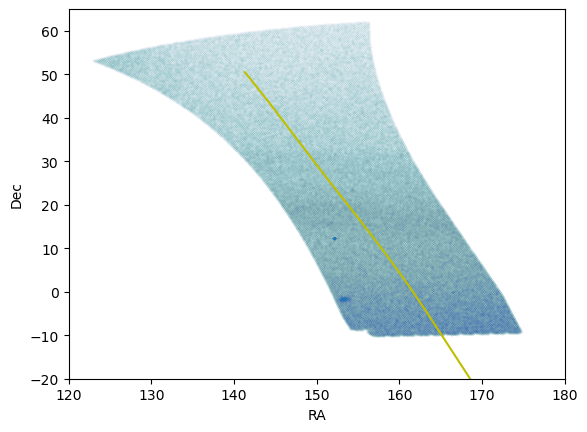

In [103]:
# the overdensity at Dec ~ 20 is Sgr. The overdensity at Dec ~30 is GD1
# Sextans is at RA 153,Dec -1.5, Leo 1 is at RA 152,Dec +12
# what is going on at Dec -10? It is a crowded place in the Galstream map, and/or maybe just density going up as it gets near the disk
plt.plot(orftarg['RA'],orftarg['Dec'],'.',ms=0.01)
plt.plot(orfgs.track.ra, orfgs.track.dec,'y')
plt.ylabel('Dec')
plt.xlabel('RA')
plt.ylim(-20,65)
plt.xlim(120,180)

In [13]:
orffr=orfgs.stream_frame

In [14]:
orfgsphi1 = orfgs.track.transform_to(orffr).phi1.deg
orfgsphi2 = orfgs.track.transform_to(orffr).phi2.deg

In [15]:
orftargphi1, orftargphi2 =stu.sphere_rotate(orftarg['RA'],orftarg['DEC'],orfstream['RAPOL'],orfstream['DECPOL'],orfstream['RA_REF'])

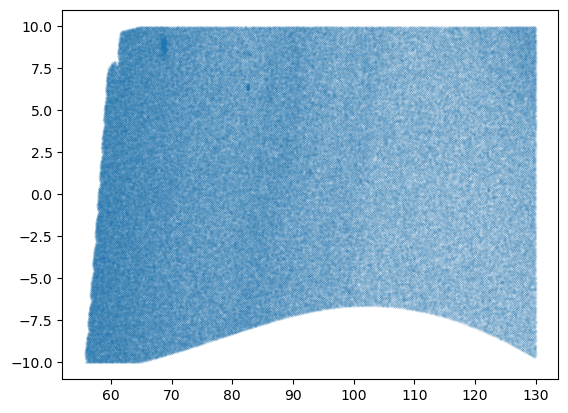

In [108]:
# sgr is phi1 80-90, GD1 is phi1 95-100. Low Dec is low phi1
# Sextans is at RA 153,Dec -1.5, Leo 1 is at RA 152,Dec +12
# cutting at phi2=6 gets rid of both dSph
plt.plot(orftargphi1,orftargphi2,'.',ms=0.05)
#plt.hlines(6,60,130)

In [20]:
np.unique(orftarg['SCND_TARGET'])

array([ 36028797018963968,  72057594037927936, 144115188075855872],
      dtype='>i8')

In [21]:
ibr=np.where(orftarg['SCND_TARGET']==36028797018963968)[0]
ift=np.where(orftarg['SCND_TARGET']==72057594037927936)[0]
ifill=np.where(orftarg['SCND_TARGET']==144115188075855872)[0]
ibf = np.where(orftarg['SCND_TARGET']!=144115188075855872)[0]

In [22]:
print(len(ibr))
print(len(ift))
print(len(ifill))
print(len(orftarg['SCND_TARGET']))
print(len(ibr)+len(ift)+len(ifill))
print(len(ibr)+len(ift))
print(len(ibf))

273206
66259
454369
793834
793834
339465
339465


(50.0, 140.0)

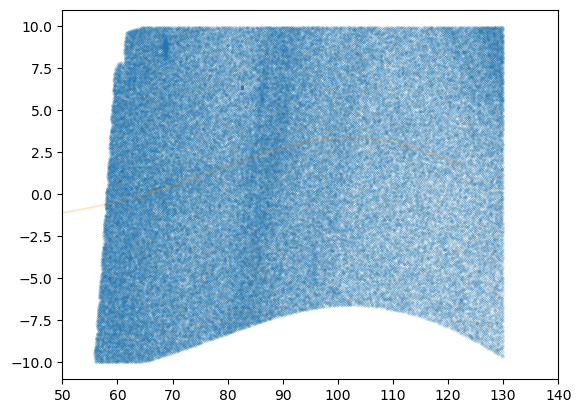

In [131]:
# sgr is phi1 80-90, GD1 is phi1 95-100. Low Dec is low phi1
# Sextans is at RA 153,Dec -1.5, Leo 1 is at RA 152,Dec +12
# What is going on at Phi1 130, phi2 > 7? 
plt.plot(orftargphi1[ibf],orftargphi2[ibf],'.',ms=0.1)
plt.plot(orfgsphi1,orfgsphi2,alpha=0.2)
plt.xlim(50,140)

In [25]:
ext_coeff = dict(g=3.237, r=2.176, z=1.217)
orfrmag=-2.5*np.log10(orftarg['FLUX_R'])+22.5-orftarg['EBV']*ext_coeff['r']
orfgmag=-2.5*np.log10(orftarg['FLUX_G'])+22.5-orftarg['EBV']*ext_coeff['g']
orfzmag=-2.5*np.log10(orftarg['FLUX_Z'])+22.5-orftarg['EBV']*ext_coeff['z']

orfgmr=orfgmag-orfrmag

/var/folders/c1/96nd_8m96j1gj0z8l34tsx1c0000gn/T/ipykernel_23791/2931510315.py:4: RuntimeWarning: divide by zero encountered in log10
  orfzmag=-2.5*np.log10(orftarg['FLUX_Z'])+22.5-orftarg['EBV']*ext_coeff['z']
/var/folders/c1/96nd_8m96j1gj0z8l34tsx1c0000gn/T/ipykernel_23791/2931510315.py:4: RuntimeWarning: invalid value encountered in log10
  orfzmag=-2.5*np.log10(orftarg['FLUX_Z'])+22.5-orftarg['EBV']*ext_coeff['z']


(21.5, 16.0)

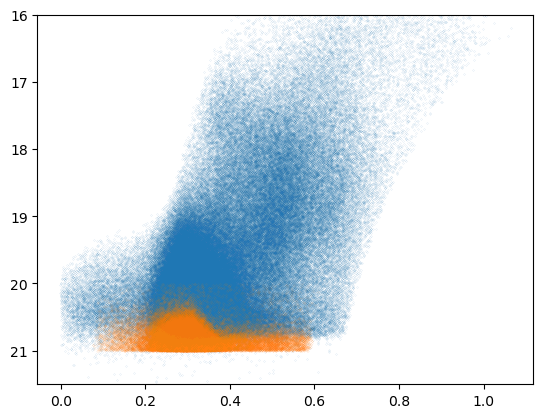

In [26]:
plt.plot(orfgmr[ibr],orfrmag[ibr],'.',ms=0.1)
plt.plot(orfgmr[ift],orfrmag[ift],'.',ms=0.1)
plt.ylim(21.5,16)

(22.0, 16.0)

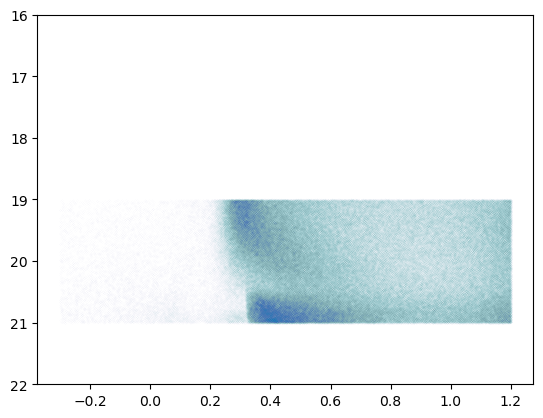

In [27]:
plt.plot(orfgmr[ifill],orfrmag[ifill],'.',ms=0.01)
plt.ylim(22,16)

In [28]:
orfdist = stu.distanceOrphan(orftargphi1)
orfdm = 5*np.log10(orfdist*1000/10)
orfMr = orfrmag-orfdm

In [29]:
orfcmd = stu.cmd_interpolator(orfstream)

In [30]:
orfgmrinterp = orfcmd(orfMr)

(5.0, -1.5)

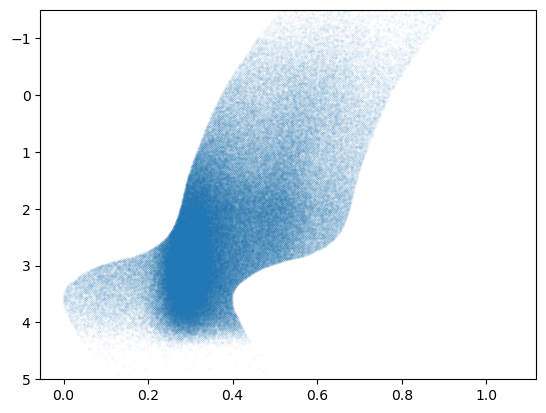

In [31]:
plt.plot(orfgmr[ibr],orfMr[ibr],'.',ms=0.05)
#plt.plot(orfgmrinterp[ibr],orfMr[ibr],'.',ms=0.1)
plt.ylim(5,-1.5)

In [32]:
# phi2(phi1) track, taken from is_in_Orphan. 
TRACK = scipy.interpolate.CubicSpline([-59.5063252 , -54.98595359, -50.46558198, -45.94521037,
         -41.42483877, -36.90446716, -32.38409555, -27.86372394, -23.34335233, -18.82298072, -14.30260911,  -9.7822375 ,
        -5.26186589,  -0.74149428,   3.77887733,   8.29924894, 12.81962055,  17.33999216,  21.86036377,  26.38073538,
        30.90110699,  35.4214786 ,  39.94185021,  44.46222182, 48.98259343,  53.50296504,  58.02333665,  62.54370826,
        67.06407987,  71.58445148,  76.10482309,  80.6251947 , 85.14556631,  89.66593792,  94.18630953,  98.70668114,
       103.22705275, 107.74742436, 112.26779597, 116.78816758,121.6285655],
                                          [ 2.20688513,  1.6322218 ,  1.31386607,  1.16160014,  1.06367966,
        0.92047428,  0.70058242,  0.42876742,  0.13513296, -0.15110421, -0.40922802, -0.63771106, -0.83736855, -1.01037432, -1.15708948,
       -1.28008839, -1.3793852 , -1.45784767, -1.51522725, -1.55227798, -1.56013905, -1.53218212, -1.45794359, -1.33084717, -1.14114979,
       -0.88779606, -0.57301104, -0.19990779,  0.22788766,  0.70829352, 1.23313556,  1.77444494,  2.29368518,  2.74937245,  3.10818642,
        3.32179568,  3.37136139,  3.24190781,  2.94622529,  2.47881644, 1.8])

In [44]:
orftargdphi2 = orftargphi2 - TRACK(orftargphi1)

In [34]:
xpmra, xpmdec = stu.correct_pm(orftarg['RA'], orftarg['DEC'],
                               orftarg['PMRA'], orftarg['PMDEC'], stu.distanceOrphan(orftargphi1))

In [35]:
pmfi1, pmfi2 = stu.rotate_pm(orftarg['RA'], orftarg['DEC'], xpmra, xpmdec,
                             orfstream['RAPOL'], orfstream['DECPOL'], orfstream['RA_REF'])

(50.0, 140.0)

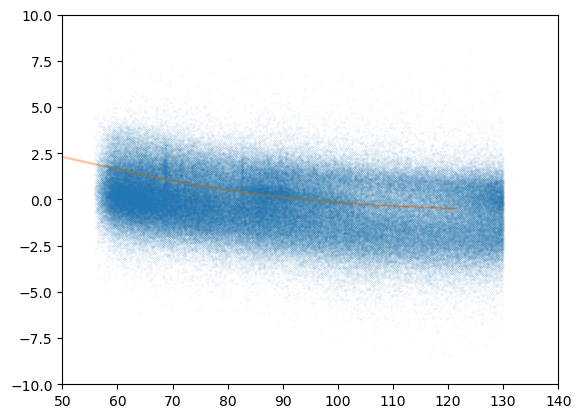

In [36]:
# I think the track goes through the blob that is Sgr at 80<phi1<90.  See below, that track at ~2.5 mas/year are the 0 pm objects
plt.plot(orftargphi1[ibr], pmfi1[ibr],'.',ms=0.05)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi1_cosphi2.value,'.',ms=0.02)
plt.ylim(-10,10)
plt.xlim(50,140)

(50.0, 140.0)

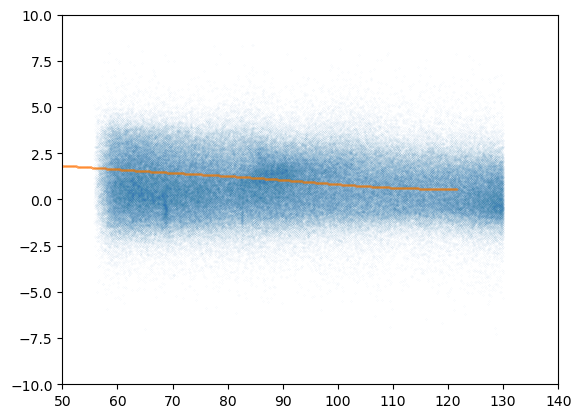

In [38]:
# I see Sgr, where is Orphan? 
plt.plot(orftargphi1[ibr], pmfi2[ibr],'.',ms=0.03)
plt.plot(orfgsphi1,mwsts['Orphan-K23'].track.transform_to(orffr).pm_phi2.value,'.',ms=0.05)
plt.ylim(-10,10)
plt.xlim(50,140)

(50.0, 140.0)

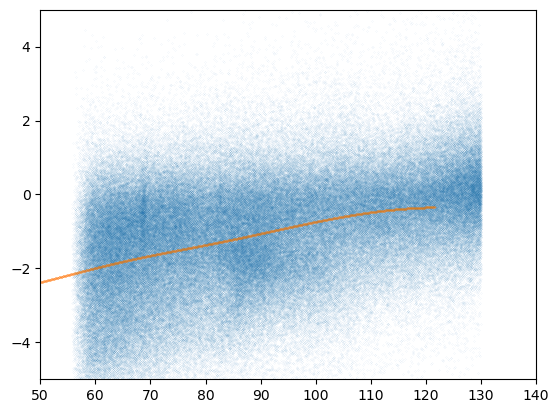

In [39]:
plt.plot(orftargphi1[ibr], orftarg['PMRA'][ibr],'.',ms=0.05)
plt.plot(orfgsphi1,mwsts['Orphan-K23'].track.pm_ra_cosdec.value,'.',ms=0.05)
plt.ylim(-5,5)
plt.xlim(50,140)

(50.0, 140.0)

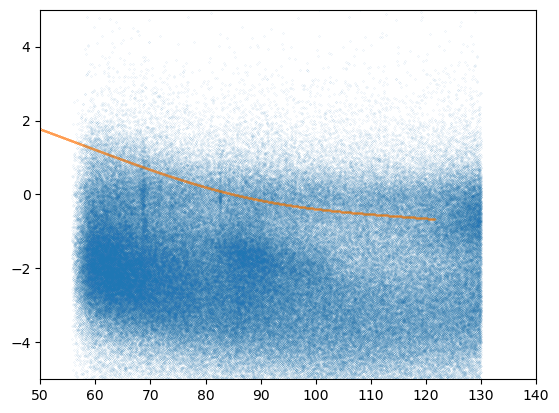

In [40]:
plt.plot(orftargphi1[ibr], orftarg['PMDEC'][ibr],'.',ms=0.1)
plt.plot(orfgsphi1,mwsts['Orphan-K23'].track.pm_dec.value,'.',ms=0.05)
plt.ylim(-5,5)
plt.xlim(50,140)

Text(0.5, 1.0, 'Orphan Gaia targets')

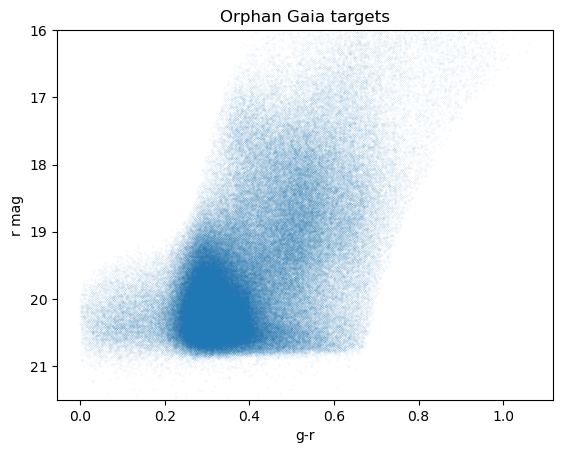

In [41]:
plt.plot(orfgmr[ibr],orfrmag[ibr],'.',ms=0.05)
#plt.plot(orfgmr[ibf],orfrmag[ibf],'.',ms=0.01)
plt.ylim(21.5,16)
plt.ylabel('r mag')
plt.xlabel('g-r')
plt.title('Orphan Gaia targets')

Text(0.5, 1.0, 'Orphan Gaia targets, isochrones at 15, 30, 55 kpc')

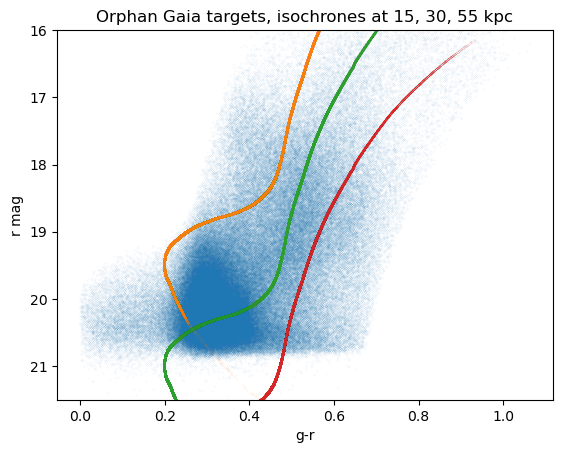

In [42]:
plt.plot(orfgmr[ibr],orfrmag[ibr],'.',ms=0.05)
#plt.plot(orfgmr[ibf],orfrmag[ibf],'.',ms=0.01)
plt.ylim(21.5,16)
plt.plot(orfgmrinterp[ibr],orfMr[ibr]+15.88,'.',ms=0.1)
plt.plot(orfgmrinterp[ibr],orfMr[ibr]+17.38,'.',ms=0.1)
plt.plot(orfgmrinterp[ibr],orfMr[ibr]+18.89,'.',ms=0.1)
plt.ylabel('r mag')
plt.xlabel('g-r')
plt.title('Orphan Gaia targets, isochrones at 15, 30, 55 kpc')

TRACK = scipy.interpolate.CubicSpline([-59.5063252 , -54.98595359, -50.46558198, -45.94521037,
         -41.42483877, -36.90446716, -32.38409555, -27.86372394, -23.34335233, -18.82298072, -14.30260911,  -9.7822375 ,
        -5.26186589,  -0.74149428,   3.77887733,   8.29924894, 12.81962055,  17.33999216,  21.86036377,  26.38073538,
        30.90110699,  35.4214786 ,  39.94185021,  44.46222182, 48.98259343,  53.50296504,  58.02333665,  62.54370826,
        67.06407987,  71.58445148,  76.10482309,  80.6251947 , 85.14556631,  89.66593792,  94.18630953,  98.70668114,
       103.22705275, 107.74742436, 112.26779597, 116.78816758,121.6285655],
                                          [ 2.20688513,  1.6322218 ,  1.31386607,  1.16160014,  1.06367966,
        0.92047428,  0.70058242,  0.42876742,  0.13513296, -0.15110421, -0.40922802, -0.63771106, -0.83736855, -1.01037432, -1.15708948,
       -1.28008839, -1.3793852 , -1.45784767, -1.51522725, -1.55227798, -1.56013905, -1.53218212, -1.45794359, -1.33084717, -1.14114979,
       -0.88779606, -0.57301104, -0.19990779,  0.22788766,  0.70829352, 1.23313556,  1.77444494,  2.29368518,  2.74937245,  3.10818642,
        3.32179568,  3.37136139,  3.24190781,  2.94622529,  2.47881644, 1.8])

orftargdphi2 = orftargphi2 - TRACK(orftargphi1)

In [45]:
# stars near stream track, +/- 1.5 deg from the track (width of one desi field)
itrack=np.where((np.abs(orftargdphi2[ibf]) < 4.25)&((orftargphi1[ibf] > np.min(orfgsphi1))&(orftargphi1[ibf] < np.max(orfgsphi1))))[0]
itrackbr=np.where((np.abs(orftargdphi2[ibr]) < 4.25)&((orftargphi1[ibr] > np.min(orfgsphi1))&(orftargphi1[ibr] < np.max(orfgsphi1))))[0]

In [47]:
# now a tighter cut, use Sergey's GD-1 width of 0.2 deg. GD1 is about 0.5 deg wide. Orphan little wider but the literature is all over the place
istream=np.where((np.abs(orftargdphi2[ibf]) < 0.2)&((orftargphi1[ibf] > np.min(orfgsphi1))&(orftargphi1[ibf] < np.max(orfgsphi1))))[0]
istreambr=np.where((np.abs(orftargdphi2[ibr]) < 0.2)&((orftargphi1[ibr] > np.min(orfgsphi1))&(orftargphi1[ibr] < np.max(orfgsphi1))))[0]
# I expect these two to be the same length. maybe +/-1 is OK
print(len(np.where((orfzmag[ibf]<20)&(np.abs(orftargdphi2[ibf]) < 0.2)&((orftargphi1[ibf] > np.min(orfgsphi1))&(orftargphi1[ibf] < np.max(orfgsphi1))))[0]))
print(len(np.where((orfzmag[ibr]<20)&(np.abs(orftargdphi2[ibr]) < 0.2)&((orftargphi1[ibr] > np.min(orfgsphi1))&(orftargphi1[ibr] < np.max(orfgsphi1))))[0]))

3206
3205


(50.0, 125.0)

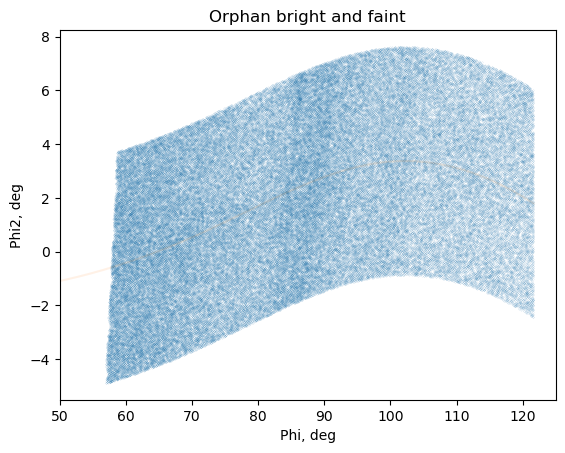

In [48]:
plt.plot(orftargphi1[ibf[itrack]],orftargphi2[ibf[itrack]],'.',ms=0.1)
plt.plot(orfgsphi1,orfgsphi2,alpha=0.1)
plt.xlabel('Phi, deg')
plt.ylabel('Phi2, deg')
plt.title('Orphan bright and faint')
plt.xlim(50,125)

(50.0, 125.0)

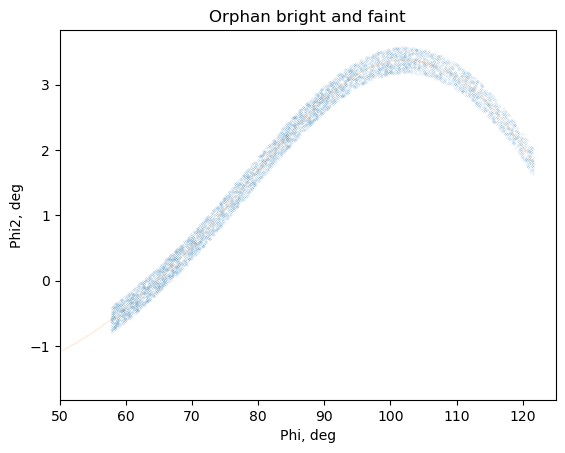

In [49]:
plt.plot(orftargphi1[ibf[istream]],orftargphi2[ibf[istream]],'.',ms=0.1)
plt.plot(orfgsphi1,orfgsphi2,alpha=0.1)
plt.xlabel('Phi, deg')
plt.ylabel('Phi2, deg')
plt.title('Orphan bright and faint')
plt.xlim(50,125)

(50.0, 140.0)

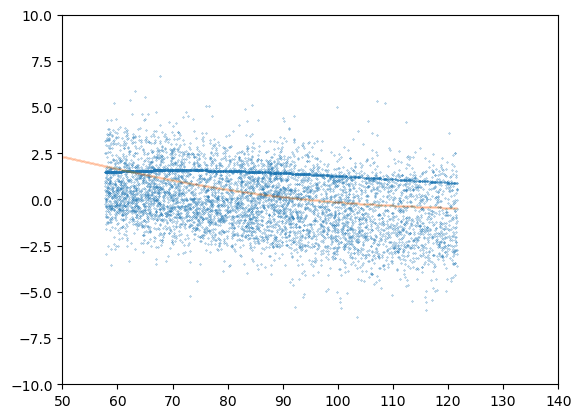

In [50]:
# are the stars at pm ~2 mas/year are the PM=0 objects, or Orphan? 
plt.plot(orftargphi1[ibf[istream]], pmfi1[ibf[istream]],'.',ms=0.5)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi1_cosphi2.value,'.',ms=0.02)
plt.ylim(-10,10)
plt.xlim(50,140)

(50.0, 140.0)

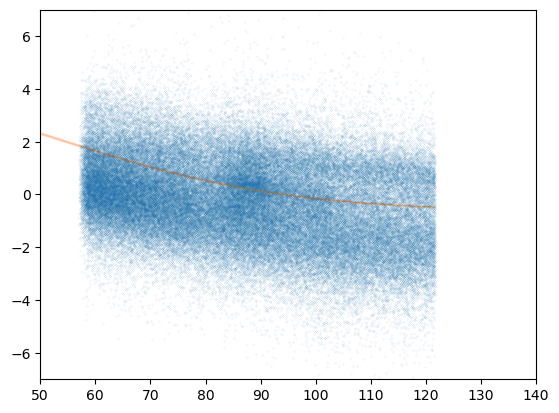

In [141]:
plt.plot(orftargphi1[ibr[itrackbr]], pmfi1[ibr[itrackbr]],'.',ms=0.1)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi1_cosphi2.value,'.',ms=0.02)
plt.ylim(-7,7)
plt.xlim(50,140)

(50.0, 140.0)

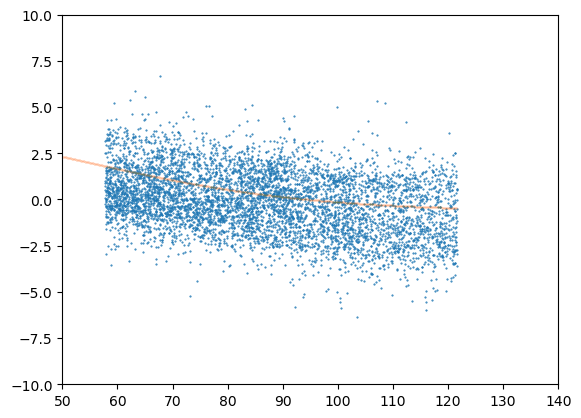

In [52]:
plt.plot(orftargphi1[ibr[istreambr]], pmfi1[ibr[istreambr]],'.',ms=1)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi1_cosphi2.value,'.',ms=0.02)
plt.ylim(-10,10)
plt.xlim(50,140)

Now check pm phi2

(50.0, 140.0)

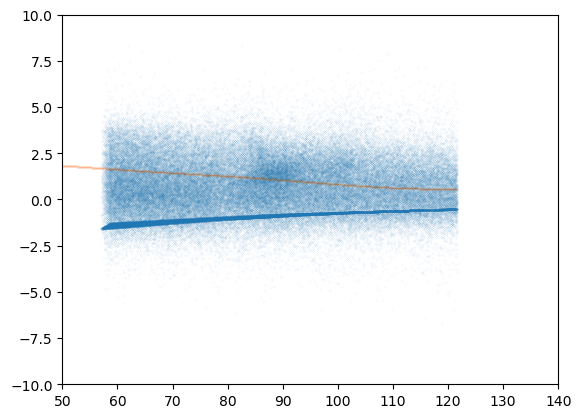

In [53]:
plt.plot(orftargphi1[ibf[itrack]], pmfi2[ibf[itrack]],'.',ms=0.05)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi2.value,'.',ms=0.02)
plt.ylim(-10,10)
plt.xlim(50,140)

(50.0, 140.0)

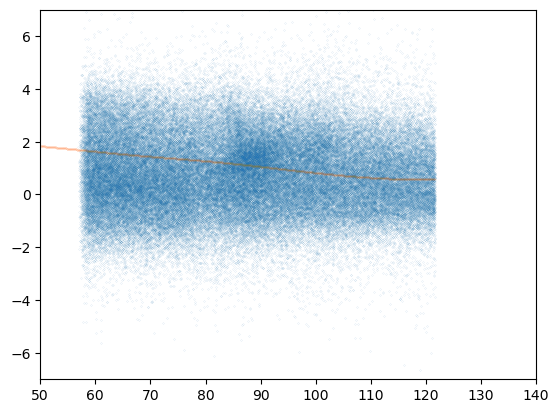

In [142]:
plt.plot(orftargphi1[ibr[itrackbr]], pmfi2[ibr[itrackbr]],'.',ms=0.1)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi2.value,'.',ms=0.02)
plt.ylim(-7,7)
plt.xlim(50,140)

(50.0, 140.0)

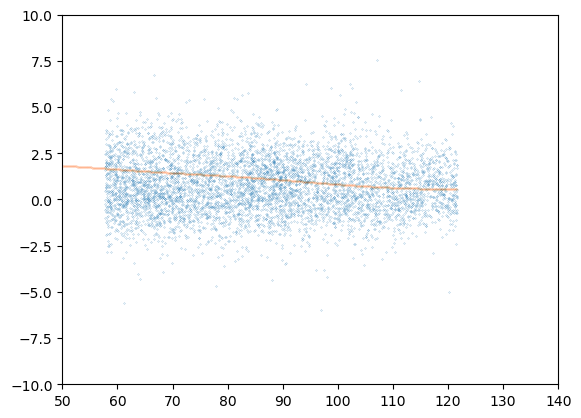

In [55]:
plt.plot(orftargphi1[ibr[istreambr]], pmfi2[ibr[istreambr]],'.',ms=0.3)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi2.value,'.',ms=0.02)
plt.ylim(-10,10)
plt.xlim(50,140)

In [56]:
print(len(istream))
print(len(istreambr))

7228
5827


In [57]:
print(len(itrack))
print(len(itrackbr))

145105
116659


In [58]:
# count targets +/- 0.2 deg vs. phi1
# binsize in deg
def lindensity(phi1vals, binsize):
    phi1min = np.min(phi1vals)
    phi1max = np.max(phi1vals)
    nbins = np.int64((phi1max-phi1min)/binsize)
    histvals, binedges = np.histogram(phi1vals, nbins)
    bsize=binedges[1]-binedges[0]
    print(bsize)
    bincen = binedges[:(nbins)]+bsize/2
    return histvals/binsize,bincen
    

In [59]:
histvals,bincen = lindensity(orftargphi1[ibf[istream]],10)

10.650301125567893


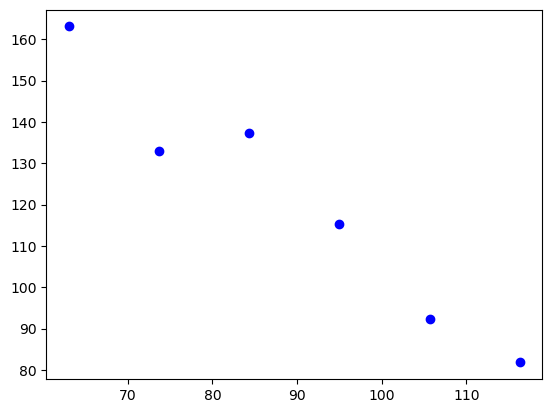

In [60]:
plt.plot(bincen, histvals,'bo')

In [61]:
bincen

array([ 63.05032037,  73.7006215 ,  84.35092262,  95.00122375,
       105.65152488, 116.301826  ])

In [62]:
print(np.max(orftargphi1[ibf[istream]]))
print(np.min(orftargphi1[ibf[istream]]))

121.62697656422684
57.725169810819494


In [63]:
histvals

array([163.1, 132.9, 137.4, 115.4,  92.2,  81.8])

Text(0.5, 1.0, 'Orphan Gaia targets')

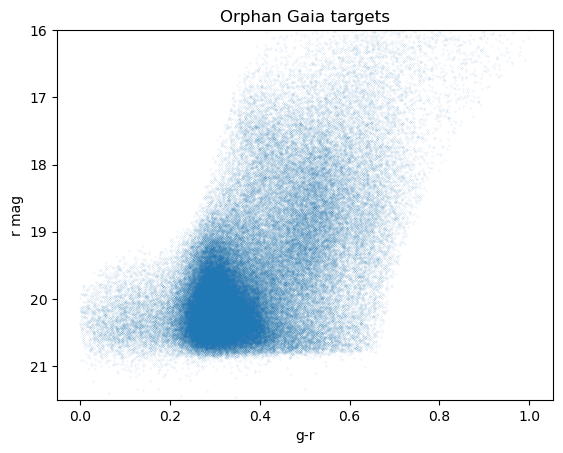

In [64]:
# we pretty clearly get the RGB of the stream, the phi2 cut removes the dSph, GD1 is at the wrong distance. could be Sgr?
plt.plot(orfgmr[ibr[itrackbr]],orfrmag[ibr[itrackbr]],'.',ms=0.1)
#plt.plot(orfgmr[ibf],orfrmag[ibf],'.',ms=0.01)
plt.ylim(21.5,16)
plt.ylabel('r mag')
plt.xlabel('g-r')
plt.title('Orphan Gaia targets')

(5.0, -1.5)

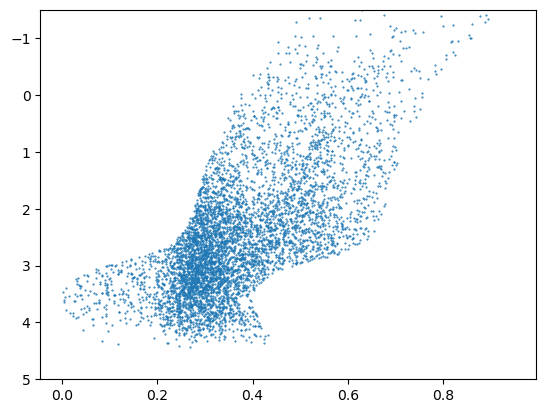

In [109]:
# we pretty clearly get the RGB of the stream, the phi2 cut removes the dSph, GD1 is at the wrong distance. could be Sgr?
plt.plot(orfgmr[ibr[istreambr]],orfMr[ibr[istreambr]],'.',ms=1)
#plt.plot(orfgmrinterp[ibr],orfMr[ibr],'.',ms=0.1)
plt.ylim(5,-1.5)

(5.0, -1.5)

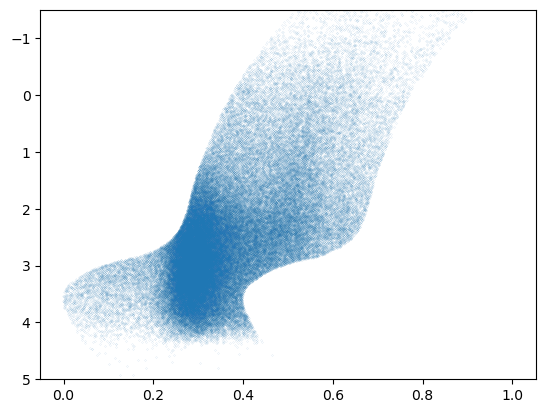

In [110]:
plt.plot(orfgmr[ibr[itrackbr]],orfMr[ibr[itrackbr]],'.',ms=0.1)
#plt.plot(orfgmrinterp[ibr],orfMr[ibr],'.',ms=0.005)
plt.ylim(5,-1.5)

In [111]:
# can I see the stream in phi1/phi2 density plot if I just look at the RGB?
itrackredbr=np.where((np.abs(orftargdphi2[ibr]) < 5)&(orfgmr[ibr]>0.4)&((orftargphi1[ibr] > np.min(orfgsphi1))&(orftargphi1[ibr] < np.max(orfgsphi1))))[0]

(55.0, 80.0)

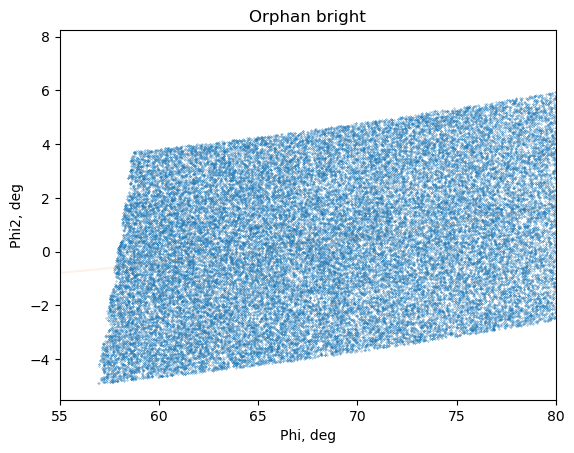

In [112]:
plt.plot(orftargphi1[ibr[itrackbr]],orftargphi2[ibr[itrackbr]],'.',ms=0.5)
plt.plot(orfgsphi1,orfgsphi2,alpha=0.1)
plt.xlabel('Phi, deg')
plt.ylabel('Phi2, deg')
plt.title('Orphan bright')
plt.xlim(55,80)

(50.0, 140.0)

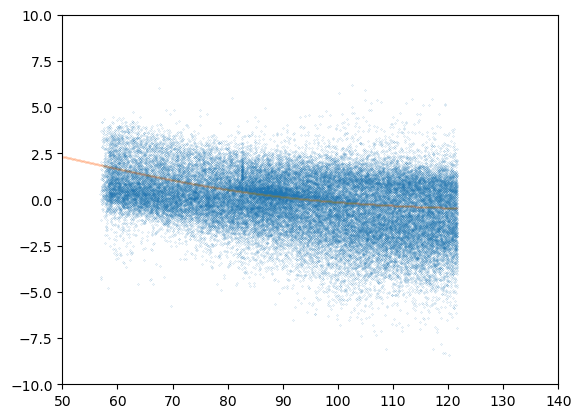

In [143]:
plt.plot(orftargphi1[ibr[itrackredbr]], pmfi1[ibr[itrackredbr]],'.',ms=0.2)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi1_cosphi2.value,'.',ms=0.02)
plt.ylim(-10,10)
plt.xlim(50,140)

(55.0, 125.0)

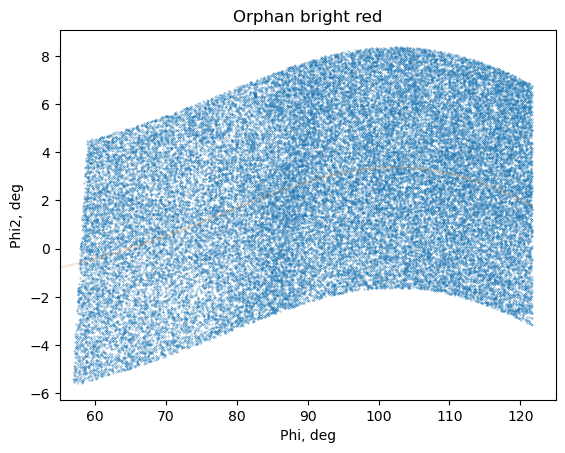

In [114]:
plt.plot(orftargphi1[ibr[itrackredbr]],orftargphi2[ibr[itrackredbr]],'.',ms=0.5)
plt.plot(orfgsphi1,orfgsphi2,alpha=0.2)
plt.xlabel('Phi, deg')
plt.ylabel('Phi2, deg')
plt.title('Orphan bright red')
plt.xlim(55,125)

(50.0, 125.0)

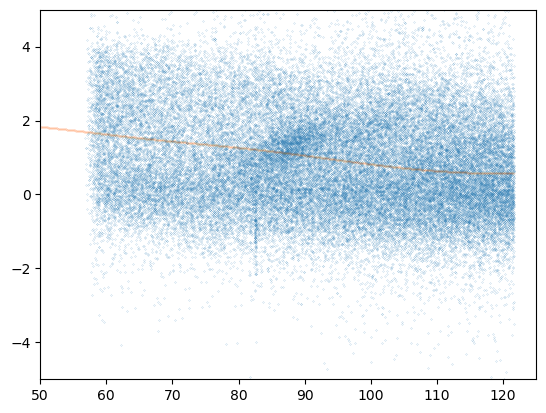

In [144]:
plt.plot(orftargphi1[ibr[itrackredbr]], pmfi2[ibr[itrackredbr]],'.',ms=0.2)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi2.value,'.',ms=0.02)
plt.ylim(-5,5)
plt.xlim(50,125)

In [116]:
# I think we just barely get the stream in the current PM selection. I think it is near zero in pm_phi1 and pm_phi2. Maybe the PMtrack is off?
# But I think I should see thew stream in phi1,phi2

In [162]:
# try a tighter PM cut, the whole CMD and just the RGB
itrackfixbr=np.where((pmfi2[ibr]<0.5)&(pmfi1[ibr]>0)&(np.abs(orftargdphi2[ibr]) < 6)&((orftargphi1[ibr] > np.min(orfgsphi1))&(orftargphi1[ibr] < np.max(orfgsphi1))))[0]
itrackredfixbr=np.where((pmfi2[ibr]<0.5)&(pmfi1[ibr]>0)&(np.abs(orftargdphi2[ibr]) < 6)&(orfgmr[ibr]>0.4)&((orftargphi1[ibr] > np.min(orfgsphi1))&(orftargphi1[ibr] < np.max(orfgsphi1))))[0]

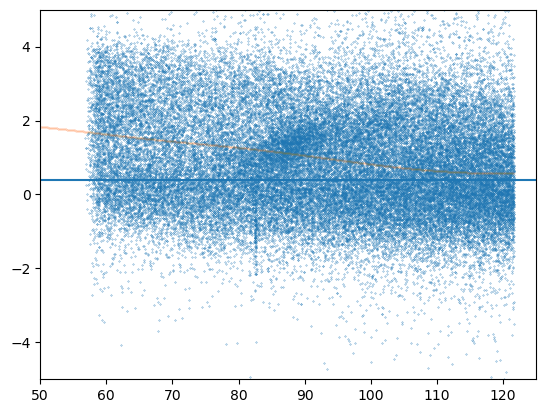

In [163]:
# test additional pmphi2 cut, is 0.5 right?
plt.plot(orftargphi1[ibr[itrackredbr]], pmfi2[ibr[itrackredbr]],'.',ms=0.5)
#plt.plot(orftargphi1[ibr[itrackredfixbr]], pmfi2[ibr[itrackredfixbr]],'.',ms=0.5)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi2.value,'.',ms=0.02)
plt.ylim(-5,5)
plt.xlim(50,125)
plt.hlines(0.4,50,125)

(50.0, 125.0)

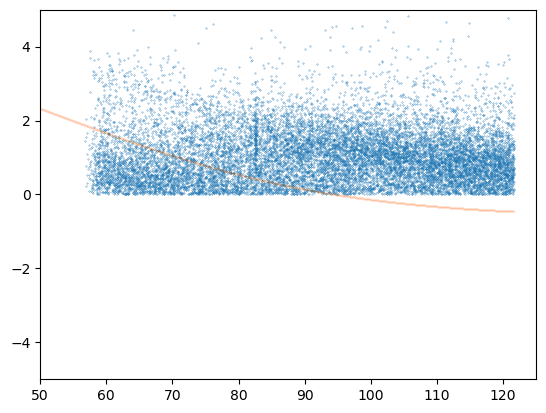

In [164]:
# test additional pmphi1 cut
plt.plot(orftargphi1[ibr[itrackredfixbr]], pmfi1[ibr[itrackredfixbr]],'.',ms=0.5)
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi1_cosphi2.value,'.',ms=0.02)
plt.ylim(-5,5)
plt.xlim(50,125)

(55.0, 120.0)

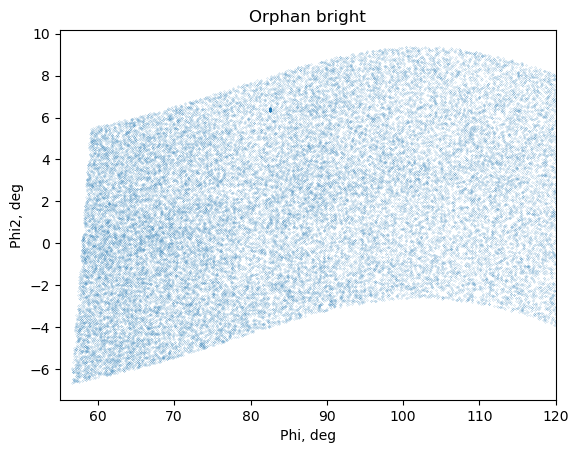

In [165]:
# still not obvious
plt.plot(orftargphi1[ibr[itrackfixbr]],orftargphi2[ibr[itrackfixbr]],'.',ms=0.2)
#plt.plot(orfgsphi1,orfgsphi2,alpha=0.1)
plt.xlabel('Phi, deg')
plt.ylabel('Phi2, deg')
plt.title('Orphan bright')
plt.xlim(55,120)

(-5.0, 5.0)

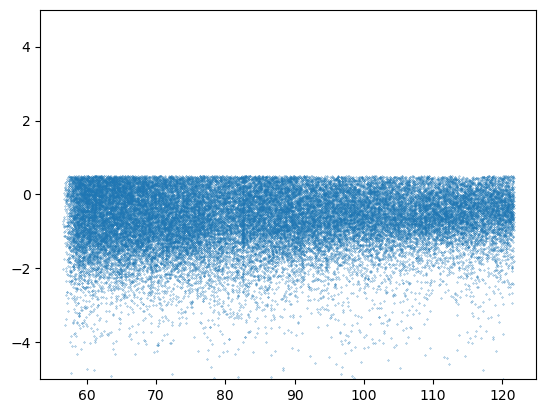

In [166]:
# test additional pmphi2 cut
plt.plot(orftargphi1[ibr[itrackfixbr]], pmfi2[ibr[itrackfixbr]],'.',ms=0.5)
plt.ylim(-5,5)

(-5.0, 5.0)

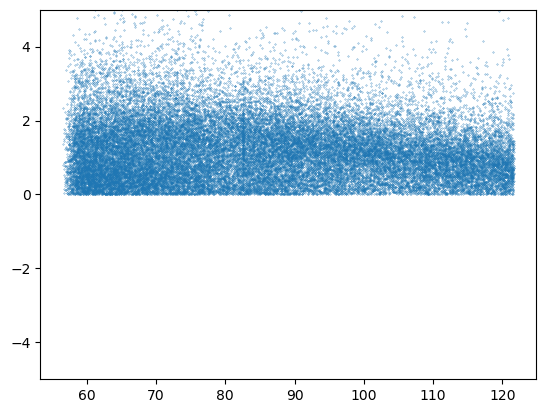

In [167]:
# test additional pmphi1 cut
plt.plot(orftargphi1[ibr[itrackfixbr]], pmfi1[ibr[itrackfixbr]],'.',ms=0.5)
plt.ylim(-5,5)

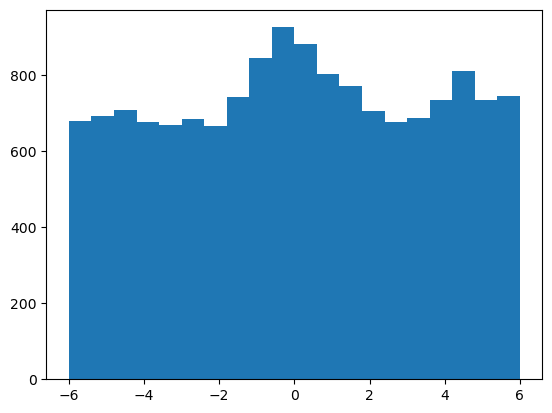

In [168]:
# collapse along phi1, look for the stream in phi2. There it is. The extra peak at phi2 = 5 is Leo 1
a,b,c=plt.hist(orftargdphi2[ibr[itrackredfixbr]],bins=20)

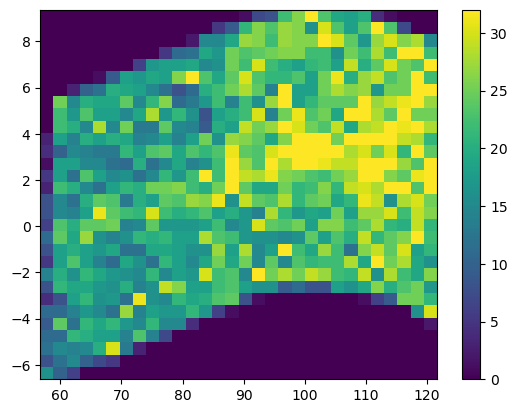

In [173]:
# whatever is going on at large phi1 and phi2 >~ 7 is still there. But now I see Orphan
a,b,c,d=plt.hist2d(orftargphi1[ibr[itrackredfixbr]],orftargphi2[ibr[itrackredfixbr]],bins=[30,30],vmax=32)
plt.colorbar()

(50.0, 130.0)

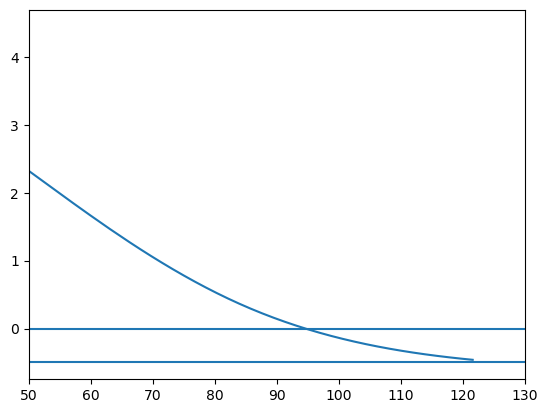

In [174]:
# what exactly does the track predict for the PM in phi1, where does it go to 0?
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi1_cosphi2.value)
plt.hlines(0,-50,130)
plt.hlines(-0.5,-50,130)
plt.xlim(50,130)

(50.0, 130.0)

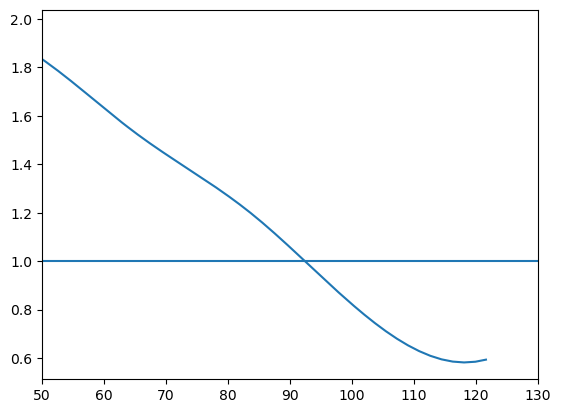

In [175]:
# track predction for pm phi2
plt.plot(orfgsphi1,orfgs.track.transform_to(orffr).pm_phi2.value)
plt.hlines(1,-50,130)
plt.xlim(50,130)

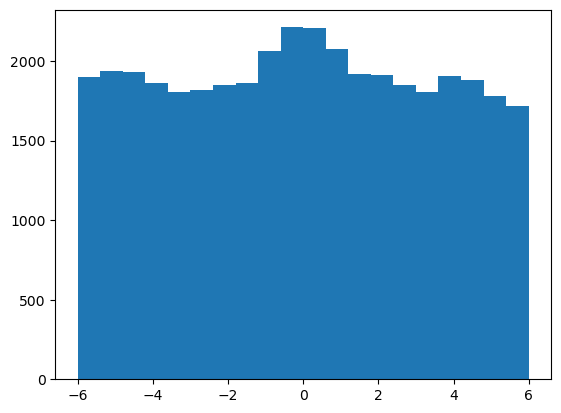

In [176]:
# yes, the stream is there if I use the whole CMD plus the extra pm cuts, though lower contrast
p,q,r=plt.hist(orftargdphi2[ibr[itrackfixbr]],bins=20)

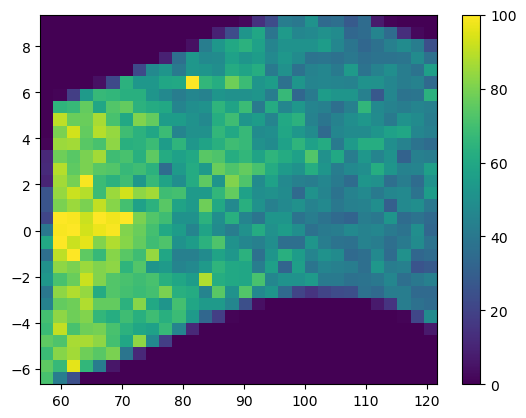

In [177]:
# disk contamination at low Phi1, i need to normalize in columns
a,b,c,d=plt.hist2d(orftargphi1[ibr[itrackfixbr]],orftargphi2[ibr[itrackfixbr]],bins=[30,30],vmax=100)
plt.colorbar()

(5.0, -1.5)

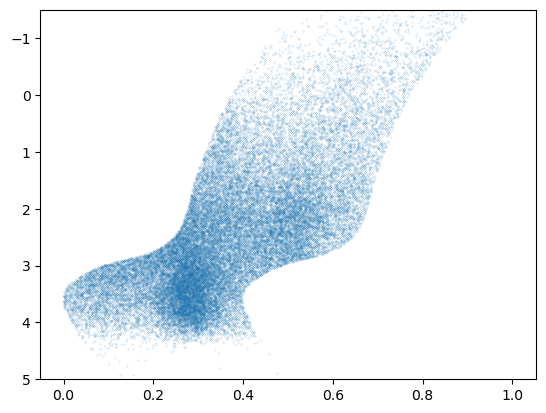

In [179]:
# maybe. What is that blob at g-r ~ 0.5?
plt.plot(orfgmr[ibr[itrackfixbr]],orfMr[ibr[itrackfixbr]],'.',ms=0.2)
plt.ylim(5,-1.5)

In [180]:
# what if I makew the opposite PM cut, the whole CMD and just the RGB
itracknobr=np.where((pmfi2[ibr]>0.5)&(pmfi1[ibr]<0)&(np.abs(orftargdphi2[ibr]) < 6)&((orftargphi1[ibr] > np.min(orfgsphi1))&(orftargphi1[ibr] < np.max(orfgsphi1))))[0]
itrackrednobr=np.where((pmfi2[ibr]>0.5)&(pmfi1[ibr]<0)&(np.abs(orftargdphi2[ibr]) < 6)&(orfgmr[ibr]>0.4)&((orftargphi1[ibr] > np.min(orfgsphi1))&(orftargphi1[ibr] < np.max(orfgsphi1))))[0]

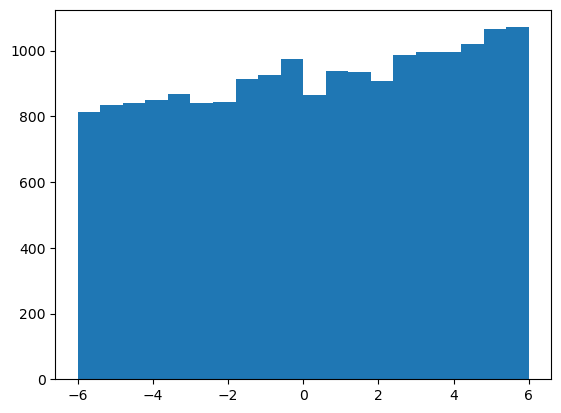

In [181]:
# collapse along phi1, look for the stream in phi2. OK, nothing
a,b,c=plt.hist(orftargdphi2[ibr[itrackrednobr]],bins=20)

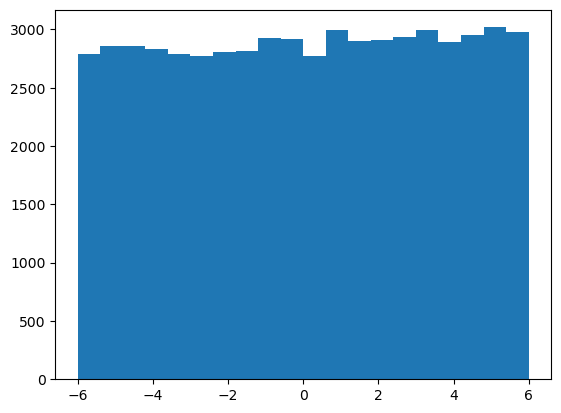

In [183]:
# still nothing
a,b,c=plt.hist(orftargdphi2[ibr[itracknobr]],bins=20)